#### Imports und Installs
Welche für das generieren von Noise verwendet werden

In [1]:
!pip install colorednoise

Alle Dependencies welche für das erstellen von den verschiedenen Noise Arten benutz wurden

In [2]:
from scipy.io.wavfile import write
from scipy.io.wavfile import read
from scipy import signal
from scipy.io import wavfile
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab
import colorednoise as cn
import IPython.display
import noisereduce as nr
import soundfile

## Sinus Welle

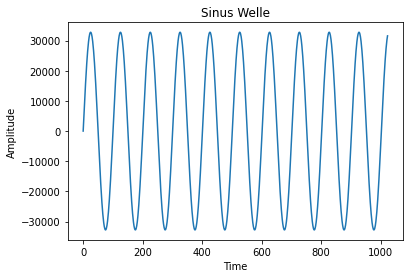

In [3]:
samplerate = 44100; fs = 440
t = np.linspace(0., 10., samplerate *10)
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2. * np.pi * fs * t)
write("../Audio/Noise/Sinus-Welle.wav", samplerate, data.astype(np.int16))

# read audio samples
input_data = read("../Audio/Noise/Sinus-Welle.wav")
audio = input_data[1]
# plot the first 1024 samples
plt.plot(audio[0:1024])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sinus Welle")
# display the plot
plt.show()

## White Noise

Nützliche Infos und Links / Quellen:
https://stackoverflow.com/questions/32237769/defining-a-white-noise-process-in-python

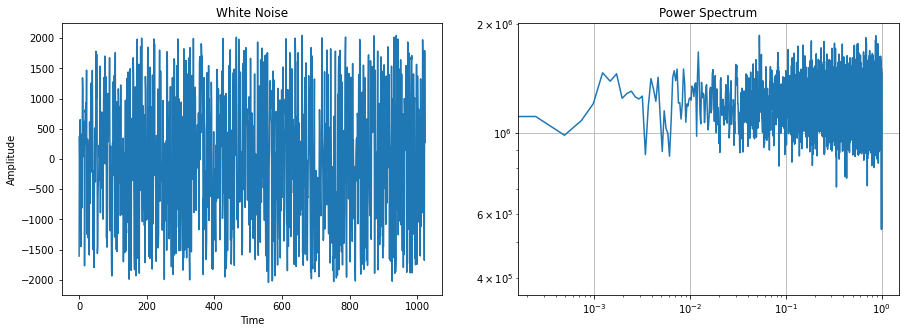

In [4]:
sample_rate = 44100
length_in_seconds = 10
amplitude = 11
noise = stats.truncnorm(-1, 1, scale=min(2**16, 2**amplitude)).rvs(sample_rate * length_in_seconds)
wavfile.write('../Audio/Noise/White-Noise.wav', sample_rate, noise.astype(np.int16))

figure, axis = plt.subplots(1,2,figsize=(15,5))

# read audio samples
input_data = read("../Audio/Noise/White-Noise.wav")
audio = input_data[1]
# plot the first 1024 samples

axis[0].plot(audio[0:1024])
# label the axes
axis[0].set_ylabel("Amplitude")
axis[0].set_xlabel("Time")
# set the title  
axis[0].set_title("White Noise")
# display the plot


s, f = mlab.psd(audio, NFFT=2**13)
axis[1].loglog(f,s)
axis[1].grid(True)
axis[1].set_title("Power Spectrum")
plt.show()


## Pink Noise Generator

[felixpatzelt/colorednoise](https://github.com/felixpatzelt/colorednoise)
 hat für Pink Noise und Brown Noise einen Herrvorragenden Noise Generator geschrieben, welcher sowohl Pink Noise wie auch Brown Noise erzeugen kann. Dieser kann nach MIT Licence privat wie auch kommerziell benutz werden.

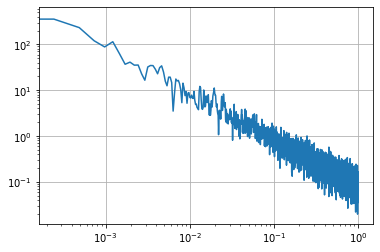

In [5]:
beta = 1 # the exponent
samples = 2**16 # number of samples to generate
y = cn.powerlaw_psd_gaussian(beta, samples)

s, f = mlab.psd(y, NFFT=2**13)
plt.loglog(f,s)
plt.grid(True)
plt.show()
                                       
soundfile.write('../Audio/Noise/Pink-Noise.wav', y, 44100, subtype='PCM_16')

## Brown Noise Generator

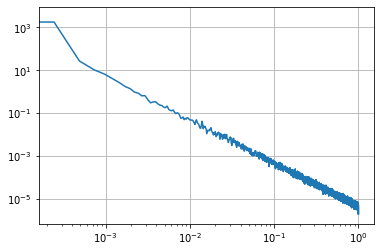

In [6]:
beta = 2 # the exponent
samples = 2**18 # number of samples to generate
y = cn.powerlaw_psd_gaussian(beta, samples)

s, f = mlab.psd(y, NFFT=2**13)
plt.loglog(f,s)
plt.grid(True)
plt.show()
                                       
wavfile.write('../Audio/Noise/Brown-Noise.wav', 44100, y)